In [281]:
# Import the necessary libraries 
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt


# LOADING THE NUMBERS DATAFRAME


In [282]:
# Load the dataframe
tn_df = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
tn_df



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [283]:
# Gives us a concise summary of our dataframe by giving us basic information concerning it
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


From our findings above, we can see that our dataframe has 5782 entries and 36 columns in total. We also have two data types namely object which are contained in 5 of our columns and int64 which is in 1 of our columns. 

In [284]:
# Returns the summary statistics of our dataframe
tn_df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [285]:
# Shows us the number of rows and columns in our dataframe
print('The dataframe contains:', tn_df.shape[0],'rows')
print('The dataframe contains:', tn_df.shape[1],'columns')


The dataframe contains: 5782 rows
The dataframe contains: 6 columns


# HANDLING MISSING VALUES

In [286]:
#Checking for null values
tn_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

There are no missing values in our dataframe.

In [287]:
#Check for duplicates
tn_df.duplicated().sum()

0

We can also see that our dataframe has no duplicates.

We have no need for the release date column in our dataframe so we will drop it. 

In [288]:
# Dropping the release_date column
tn_df= tn_df.drop('release_date', axis=1)
tn_df

,id,movie,production_budget,domestic_gross,worldwide_gross
0,1,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
5777,78,Red 11,"$7,000",$0,$0
5778,79,Following,"$6,000","$48,482","$240,495"
5779,80,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,A Plague So Pleasant,"$1,400",$0,$0


## Cleaning the production_budget, domestic_gross and worldwide_gross columns

In [289]:
# Checking the datatypes
tn_df.dtypes

id                    int64
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

Our columns represent financial information so its important for us to work with them in integer or float form so that we are able to perform mathematical operations on them. Since the three columns have object data types, we will convert them into integers.

In [290]:
# Removing the dollar signs and commas from the columns
tn_df['worldwide_gross']= tn_df['worldwide_gross'].replace('[\$,]', '', regex= True)
tn_df['production_budget']= tn_df['production_budget'].replace('[\$,]', '', regex= True)
tn_df['domestic_gross']= tn_df['domestic_gross'].replace('[\$,]', '', regex= True)

# Converting the columns into integers
tn_df['worldwide_gross']= tn_df['worldwide_gross'].astype('int64')
tn_df['production_budget']= tn_df['production_budget'].astype('int64')
tn_df['domestic_gross']= tn_df['domestic_gross'].astype('int64')

# Previewing the first five results
tn_df.head()


,id,movie,production_budget,domestic_gross,worldwide_gross
0,1,Avatar,425000000,760507625,2776345279
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,Dark Phoenix,350000000,42762350,149762350
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [291]:
# Checking to see if there are any 0 values in our worldwide_gross column
(tn_df['worldwide_gross'] == 0).sum()

367

Seeing as we have 367 zero values in our column, we will drop these records and retain the rest.

In [292]:
# Retaining the rows where the values in the worldwide_gross is greater than zero
tn_df= tn_df[tn_df['worldwide_gross']>0]

# Checking that the zero values have been dropped
assert (tn_df['worldwide_gross']== 0).sum()==0

Now we will create a profit column that will allow us to see the profitability of each movie.



In [293]:
# Subtracting the production_budget from the worldwide_gross
tn_df['profit']= (tn_df['worldwide_gross']-tn_df['production_budget'])
# Previewing the first five
tn_df.head()
                        

<ipython-input-293-aec90ee3631b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn_df['profit']= (tn_df['worldwide_gross']-tn_df['production_budget'])


,id,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,Avatar,425000000,760507625,2776345279,2351345279
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


# LOAD THE IMDB DATASET

In [294]:
import zipfile

# Extract the database file from the ZIP archive
with zipfile.ZipFile('zippedData\im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData')

# Connect to the extracted SQLite database
conn = sqlite3.connect('zippedData/im.db')

query = "SELECT name FROM sqlite_master WHERE type='table';"

tables = pd.read_sql_query(query, conn)

print("Tables in the database:")
print(tables)











Tables in the database:
            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [295]:
query = """
     SELECT *
     FROM persons
     JOIN directors
     USING (person_id)
     JOIN movie_basics
     USING (movie_id)
     JOIN movie_ratings
     USING (movie_id);
"""
imdb_df= pd.read_sql(query, conn)
imdb_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt1592569,Paano na kaya,Paano na kaya,2010,110.0,"Drama,Romance",6.4,77
1,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt1592569,Paano na kaya,Paano na kaya,2010,110.0,"Drama,Romance",6.4,77
2,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt1592569,Paano na kaya,Paano na kaya,2010,110.0,"Drama,Romance",6.4,77
3,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt1592569,Paano na kaya,Paano na kaya,2010,110.0,"Drama,Romance",6.4,77
4,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt2057445,No Other Woman,No Other Woman,2011,101.0,"Drama,Romance,Thriller",6.4,256


In [296]:
imdb_df=imdb_df.drop(['birth_year', 'death_year', 'primary_profession', 'start_year', 'numvotes', 'primary_title', 'original_title'], axis=1)
imdb_df.head(20)

,person_id,primary_name,movie_id,runtime_minutes,genres,averagerating
0,nm0062879,Ruel S. Bayani,tt1592569,110.0,"Drama,Romance",6.4
1,nm0062879,Ruel S. Bayani,tt1592569,110.0,"Drama,Romance",6.4
2,nm0062879,Ruel S. Bayani,tt1592569,110.0,"Drama,Romance",6.4
3,nm0062879,Ruel S. Bayani,tt1592569,110.0,"Drama,Romance",6.4
4,nm0062879,Ruel S. Bayani,tt2057445,101.0,"Drama,Romance,Thriller",6.4
5,nm0062879,Ruel S. Bayani,tt2057445,101.0,"Drama,Romance,Thriller",6.4
6,nm0062879,Ruel S. Bayani,tt2057445,101.0,"Drama,Romance,Thriller",6.4
7,nm0062879,Ruel S. Bayani,tt2590280,100.0,Drama,5.8
8,nm0062879,Ruel S. Bayani,tt8421806,115.0,None,7.9
9,nm0062879,Ruel S. Bayani,tt8421806,115.0,None,7.9


In [297]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181387 entries, 0 to 181386
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   person_id        181387 non-null  object 
 1   primary_name     181387 non-null  object 
 2   movie_id         181387 non-null  object 
 3   runtime_minutes  163584 non-null  float64
 4   genres           180047 non-null  object 
 5   averagerating    181387 non-null  float64
dtypes: float64(2), object(4)
memory usage: 8.3+ MB


In [298]:
imdb_df.describe()

,runtime_minutes,averagerating
count,163584.000000,181387.000000
mean,97.789484,6.217683
std,194.434689,1.388026
min,3.000000,1.000000
25%,84.000000,5.400000
50%,94.000000,6.300000
75%,107.000000,7.200000
max,51420.000000,10.000000


In [299]:
imdb_df.shape

(181387, 6)

In [300]:
imdb_df.isnull().sum()

person_id              0
primary_name           0
movie_id               0
runtime_minutes    17803
genres              1340
averagerating          0
dtype: int64

In [301]:
imdb_df.dropna(subset=['runtime_minutes', 'genres'], inplace= True)


In [302]:
imdb_df['runtime_minutes']= imdb_df['runtime_minutes'].astype('int64')

In [303]:
imdb_df.dtypes

person_id           object
primary_name        object
movie_id            object
runtime_minutes      int64
genres              object
averagerating      float64
dtype: object

# Dropping Duplicates

## Step 1: Remove Duplicate Movie Entries
This step ensures that each movie is only counted once by removing any duplicate rows from the IMDb dataset.



In [304]:
imdb_df = imdb_df.drop_duplicates()
imdb_df

,person_id,primary_name,movie_id,runtime_minutes,genres,averagerating
0,nm0062879,Ruel S. Bayani,tt1592569,110,"Drama,Romance",6.4
4,nm0062879,Ruel S. Bayani,tt2057445,101,"Drama,Romance,Thriller",6.4
7,nm0062879,Ruel S. Bayani,tt2590280,100,Drama,5.8
10,nm0064023,Bryan Beasley,tt4512140,53,Documentary,8.9
11,nm0067234,Hans Beimler,tt2098699,90,Drama,5.8
...,...,...,...,...,...,...
181380,nm9541799,Hamed Saleh,tt7849092,84,Comedy,6.5
181381,nm9701687,Benjamin Ovesen,tt8146836,55,Drama,7.4
181382,nm9748617,Frank W Chen,tt8234502,99,"Documentary,Sport",5.8
181384,nm9769561,Prasobh Vijayan,tt8273258,91,Thriller,5.7


# Handling Genre Data
## Step 2: Normalize Genre Data into Individual Rows
Movies with multiple genres are split so each genre appears in its own row. This structure allows accurate per-genre analysis.


In [305]:
imdb_df['genres'] = imdb_df['genres'].str.split(',')
imdb_df = imdb_df.explode('genres')

imdb_df

,person_id,primary_name,movie_id,runtime_minutes,genres,averagerating
0,nm0062879,Ruel S. Bayani,tt1592569,110,Drama,6.4
0,nm0062879,Ruel S. Bayani,tt1592569,110,Romance,6.4
4,nm0062879,Ruel S. Bayani,tt2057445,101,Drama,6.4
4,nm0062879,Ruel S. Bayani,tt2057445,101,Romance,6.4
4,nm0062879,Ruel S. Bayani,tt2057445,101,Thriller,6.4
...,...,...,...,...,...,...
181382,nm9748617,Frank W Chen,tt8234502,99,Documentary,5.8
181382,nm9748617,Frank W Chen,tt8234502,99,Sport,5.8
181384,nm9769561,Prasobh Vijayan,tt8273258,91,Thriller,5.7
181385,nm9781362,Grzegorz Jankowski,tt4438688,93,Comedy,5.2


# Calculating Average Rating by Genre
## Step 3: Compute Average Rating for Each Genre
The dataset is grouped by genre, and the mean IMDb rating is calculated for each group. Results are sorted from highest to lowest rated genre.


In [306]:
genre_ratings = imdb_df.groupby('genres')['averagerating'].mean().sort_values(ascending=False)
genre_ratings



genres
Short          8.800000
Documentary    7.300637
Game-Show      7.300000
News           7.263077
Biography      7.153383
Music          7.099956
History        7.053920
Sport          7.000296
War            6.596799
Musical        6.504895
Family         6.411190
Drama          6.397100
Animation      6.281203
Adventure      6.203876
Reality-TV     6.163636
Romance        6.146892
Crime          6.107764
Comedy         6.021834
Fantasy        5.921722
Mystery        5.900030
Western        5.859155
Action         5.786338
Thriller       5.575051
Sci-Fi         5.504845
Horror         4.968743
Adult          3.300000
Name: averagerating, dtype: float64

#  Preparing Genre Ratings DataFrame for Analysis
## Step 4: Finalize Genre Ratings DataFrame
The average ratings are reformatted into a clean DataFrame with clear column names and sorted values. Top 15 and Top 5 genres are selected for visualization.


In [307]:
# Group, average, and convert to a DataFrame with named columns
genre_ratings = imdb_df.groupby('genres')['averagerating'].mean().reset_index()

# Rename the columns for clarity
genre_ratings.columns = ['genre', 'average_rating']

# Sort the DataFrame by average_rating
genre_ratings = genre_ratings.sort_values(by='average_rating', ascending=False)

# Reset the index to remove numbers on the left
genre_ratings = genre_ratings.reset_index(drop=True)


# Create Top 15 and Top 5 DataFrames for plotting
top15 = genre_ratings.head(15).copy()
top5 = genre_ratings.head(5).copy()

# View the result
genre_ratings

,genre,average_rating
0,Short,8.800000
1,Documentary,7.300637
2,Game-Show,7.300000
3,News,7.263077
4,Biography,7.153383
5,Music,7.099956
6,History,7.053920
7,Sport,7.000296
8,War,6.596799
9,Musical,6.504895


# Visualizing Genre Ratings
## Step 5: Plot Top 15 IMDb Genres (Horizontal Bar Chart)
Displays the 15 highest-rated genres using a horizontal bar chart for readability. Ratings are shown directly on each bar.


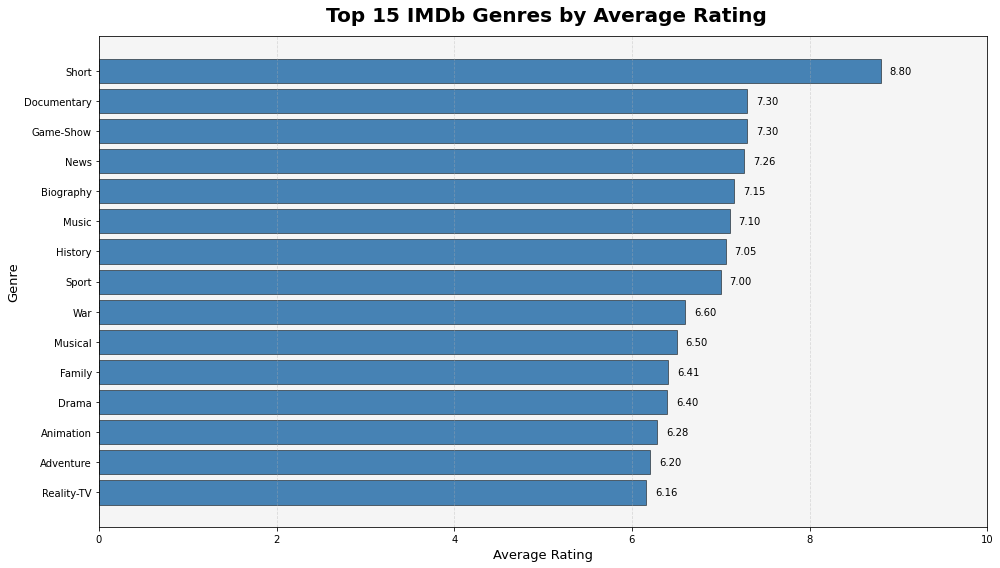

In [308]:
plt.figure(figsize=(14, 8))
bars = plt.barh(top15['genre'], top15['average_rating'],
                color='#4682B4', edgecolor='black', linewidth=0.5)

plt.gca().invert_yaxis()

# Add data labels
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.2f}", va='center', fontsize=10)

# Style
plt.title(' Top 15 IMDb Genres by Average Rating', fontsize=20, fontweight='bold', pad=15)
plt.xlabel('Average Rating', fontsize=13)
plt.ylabel('Genre', fontsize=13)
plt.xlim(0, 10)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.gca().set_facecolor('#f5f5f5')
plt.tight_layout()
plt.show()

## Step 6: Plot Top 5 Genres (Vertical Bar Chart)
Highlights the top 5 genres with the highest average IMDb ratings. Includes annotations for clarity.


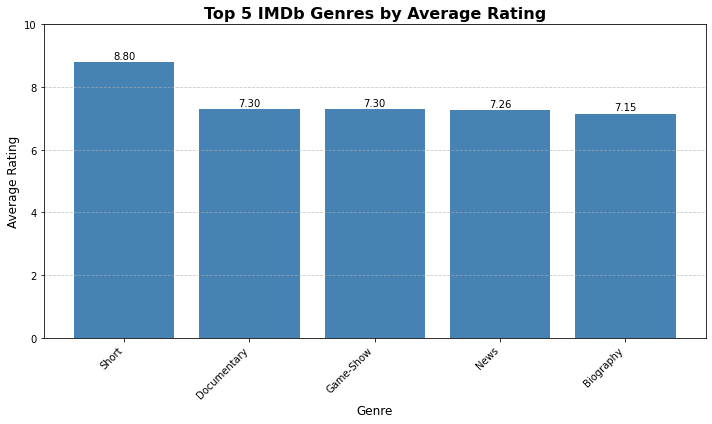

In [309]:
plt.figure(figsize=(10, 6))

# Bar plot
bars = plt.bar(top5['genre'], top5['average_rating'], color='steelblue')

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f"{height:.2f}", ha='center')

# Titles and labels
plt.title('Top 5 IMDb Genres by Average Rating', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Step 7: Line Plot of Top 15 Genre Ratings
A line chart is used to show trends in average ratings among the top 15 genres. Data labels are added for clarity.


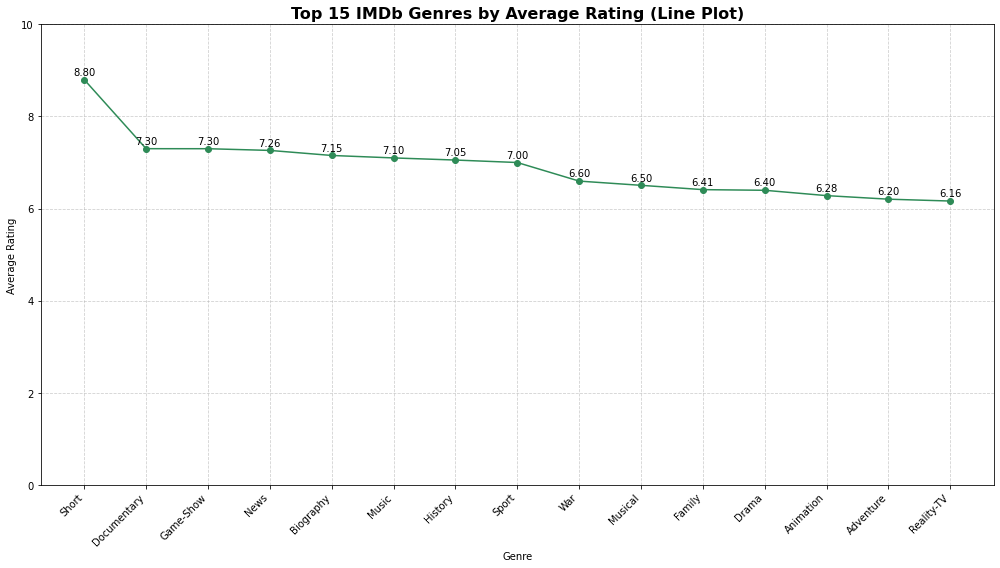

In [310]:
plt.figure(figsize=(14, 8))

# Line plot
plt.plot(top15['genre'], top15['average_rating'], marker='o', linestyle='-', color='seagreen')

# Add data labels
for i, (x, y) in enumerate(zip(top15['genre'], top15['average_rating'])):
    plt.text(i, y + 0.1, f"{y:.2f}", ha='center')

# Titles and labels
plt.title('Top 15 IMDb Genres by Average Rating (Line Plot)', fontsize=16, fontweight='bold')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.ylim(0, 10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Step 8: Bar Chart of Bottom 10 Genres by Rating
Plots the 10 lowest-rated genres to highlight underperformers. Annotations provide specific average rating values.

 

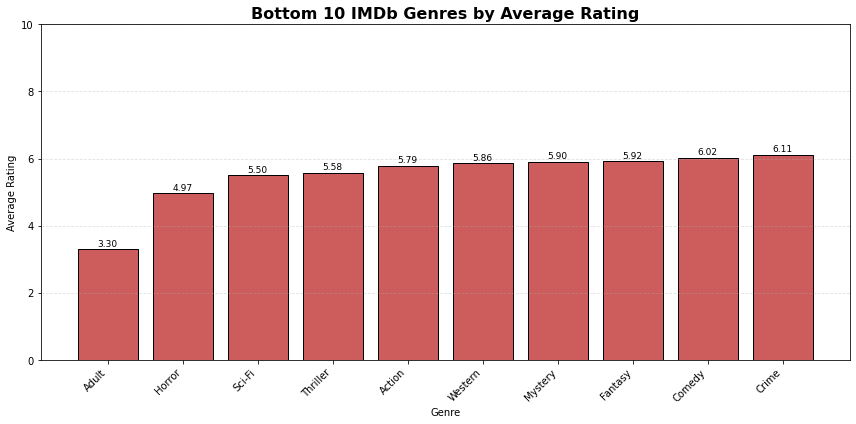

In [311]:
bottom10 = genre_ratings.tail(10).sort_values(by='average_rating')

plt.figure(figsize=(12, 6))
bars = plt.bar(bottom10['genre'], bottom10['average_rating'], color='indianred', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 10)

# Annotate
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f"{yval:.2f}", ha='center', fontsize=9)

plt.title('Bottom 10 IMDb Genres by Average Rating', fontsize=16, weight='bold')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## Step 9: IMDb Genre Ratings Summary Dashboard
Combines top and bottom genres into one visual summary. Includes:
- Top 15 horizontal bar chart
- Top 5 vertical chart
- Bottom 10 genres
- Summary insights (highest/lowest-rated and most/least common genres)


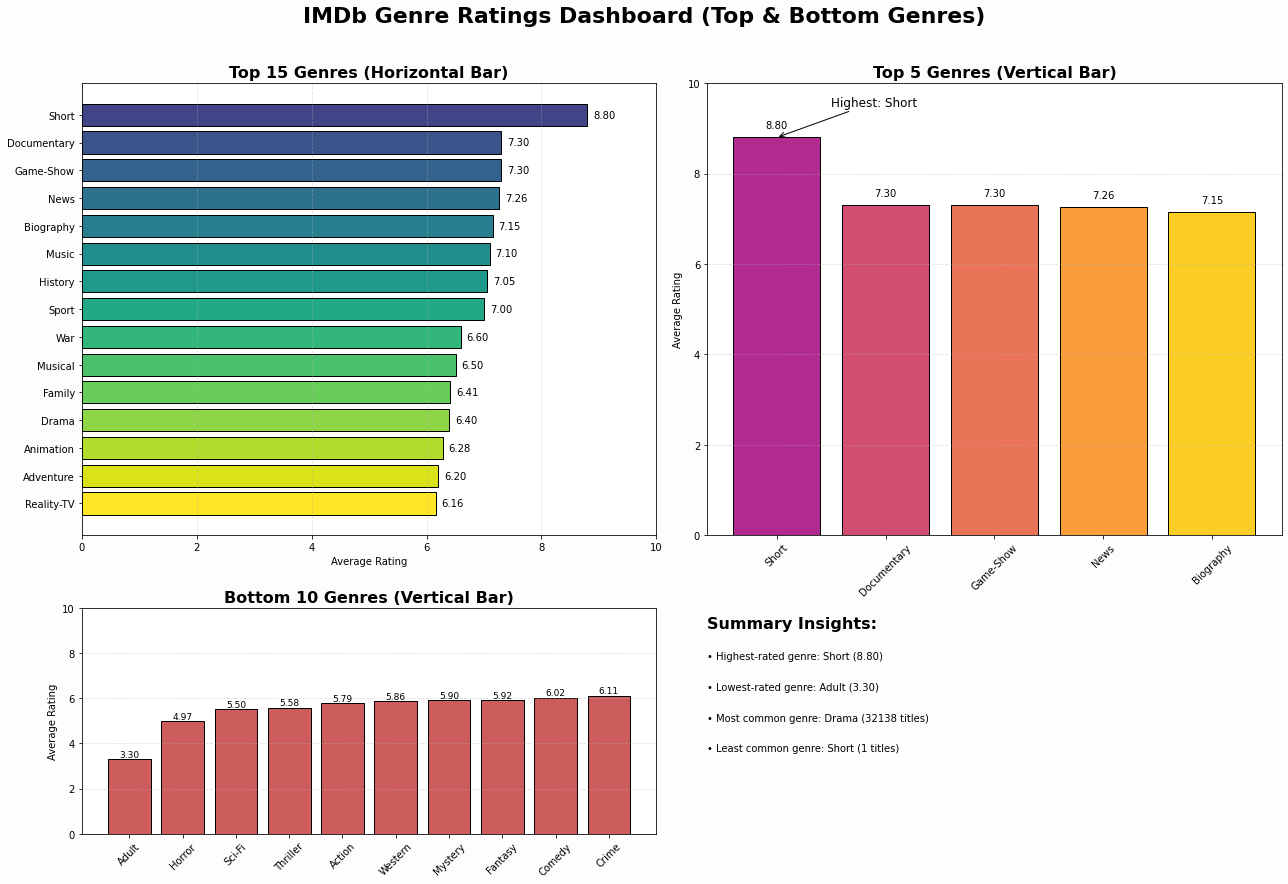

In [312]:

#  Data Preparation 
bottom10 = genre_ratings.tail(10).sort_values(by='average_rating')
top_genre = genre_ratings.iloc[0]
low_genre = genre_ratings.iloc[-1]

# Genre frequency for summary
genre_counts = imdb_df['genres'].value_counts()
most_common_genre = genre_counts.idxmax()
least_common_genre = genre_counts.idxmin()

# Plotting Layout 
fig, axs = plt.subplots(2, 2, figsize=(18, 12), gridspec_kw={'height_ratios': [2, 1]})
fig.patch.set_facecolor('#fdfdfd')  # Background color

# Subplot 1: Horizontal Bar Chart (Top 15) 
colors = cm.viridis(np.linspace(0.2, 1, len(top15)))
axs[0, 0].barh(top15['genre'], top15['average_rating'], color=colors, edgecolor='black')
axs[0, 0].invert_yaxis()
axs[0, 0].set_title('Top 15 Genres (Horizontal Bar)', fontsize=16, weight='bold')
axs[0, 0].set_xlabel('Average Rating')
axs[0, 0].set_xlim(0, 10)
axs[0, 0].grid(axis='x', linestyle='--', alpha=0.4)
for i, rating in enumerate(top15['average_rating']):
    axs[0, 0].text(rating + 0.1, i, f"{rating:.2f}", va='center', fontsize=10)

# Subplot 2: Vertical Bar Chart (Top 5) 
colors5 = cm.plasma(np.linspace(0.4, 0.9, len(top5)))
bars = axs[0, 1].bar(top5['genre'], top5['average_rating'], color=colors5, edgecolor='black')
axs[0, 1].set_title('Top 5 Genres (Vertical Bar)', fontsize=16, weight='bold')
axs[0, 1].set_ylabel('Average Rating')
axs[0, 1].set_ylim(0, 10)
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.4)
axs[0, 1].annotate(f"Highest: {top_genre['genre']}",
                   xy=(0, top_genre['average_rating']),
                   xytext=(0.5, 9.5),
                   arrowprops=dict(facecolor='black', arrowstyle='->'),
                   fontsize=12)
for bar in bars:
    axs[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
                   f"{bar.get_height():.2f}", ha='center', fontsize=10)

# Subplot 3: Bottom 10 Genres 
bars = axs[1, 0].bar(bottom10['genre'], bottom10['average_rating'], color='indianred', edgecolor='black')
axs[1, 0].set_title('Bottom 10 Genres (Vertical Bar)', fontsize=16, weight='bold')
axs[1, 0].set_ylabel('Average Rating')
axs[1, 0].set_ylim(0, 10)
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.4)
for bar in bars:
    yval = bar.get_height()
    axs[1, 0].text(bar.get_x() + bar.get_width()/2, yval + 0.1, f"{yval:.2f}", ha='center', fontsize=9)

# Subplot 4: Summary Insights 
axs[1, 1].axis('off')
axs[1, 1].text(0, 1.0, 'Summary Insights:', fontsize=16, weight='bold')
axs[1, 1].text(0, 0.85, f"• Highest-rated genre: {top_genre['genre']} ({top_genre['average_rating']:.2f})")
axs[1, 1].text(0, 0.70, f"• Lowest-rated genre: {low_genre['genre']} ({low_genre['average_rating']:.2f})")
axs[1, 1].text(0, 0.55, f"• Most common genre: {most_common_genre} ({genre_counts.max()} titles)")
axs[1, 1].text(0, 0.40, f"• Least common genre: {least_common_genre} ({genre_counts.min()} titles)")
axs[1, 1].set_xlim(0, 1)
axs[1, 1].set_ylim(0, 1.1)

# Final Layout 
plt.suptitle('IMDb Genre Ratings Dashboard (Top & Bottom Genres)', fontsize=22, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


# Recommendations
## 1: Prioritize Top-Rated Genres for Critical Acclaim
- Genres like Short, Documentary, Game Show consistently receive the highest average IMDb ratings.

Recommendation: Consider producing at least one high-quality film in one of the above top-rated genre to build studio credibility and recognition.


# 2: Explore Underserved but High-Rated Genres
- Some highly-rated genres may also be among the least common. As shown the genre Short has high ratings but few titles, it indicates potential low competition and high demand

Recommendation: Target these niches for original, impactful storytelling that can stand out.



# 3: Leverage Popular Genres for Commercial Success
- The most common genre, Drama, may not be the highest rated but indicates broad market appeal and a large audience.

Recommendation: Include at least one commercially viable film in a popular genre to balance your portfolio and generate revenue.





